### 데이터 정제

In [6]:
import pandas as pd 

data = pd.read_csv('육군 신체측정정보.csv', encoding='cp949', low_memory=False)  # 또는 'euc-kr'
selected_columns = ['신장 센티미터', '샅높이 센티미터','몸무게 킬로그램']
refined_data = data[selected_columns]

#print(refined_data.head())
new_column_names = {'신장 센티미터': '키', '몸무게 킬로그램': '몸무게', '샅높이 센티미터': '샅높이'}
refined_data = refined_data.rename(columns=new_column_names)
#print(refined_data.info())

import re
def extract_number(text):
    numbers = re.findall(r'\d+\.\d+|\d+', text)
    if numbers:
        return float(numbers[0])  
    else:
        return None  

refined_data['키'] = refined_data['키'].apply(extract_number)
refined_data['샅높이'] = refined_data['샅높이'].apply(extract_number)
refined_data['몸무게'] = refined_data['몸무게'].apply(extract_number)


#print(refined_data.info())#
#refined_data[['키','샅높이','몸무게']] = refined_data[['키','샅높이','몸무게']].astype(float)#
refined_data.to_csv('정제된데이터.csv', index=False)

filtered_data = refined_data[(refined_data['키'] >= 170) & (refined_data['키'] <= 175)]

filtered_data = filtered_data.reset_index(drop=True)
print(filtered_data.head())#
filtered_data.to_csv('170~175cm.csv', index=False)

       키   샅높이   몸무게
0  171.4  76.4  71.6
1  173.9  76.5  53.0
2  173.1  80.6  95.3
3  172.6  75.4  58.6
4  170.7  75.3  66.7


### Input Data와 Target Data 나누기

#target data만들기
#키를 통한 표준체중 계산 및 범주화
1. 키를 통해 해당 키의 저체중, 정상체중, 비만을 구한다.
2. 해당키의 몸무게를 계산해서 나온 저체중, 정상체중, 비만과 비교하여 가까운 것을 선택
3. 저체중이면 0, 정상체중이면 1, 비만이면 2로 target data를 만든다.

In [13]:
import numpy as np 
import matplotlib

#matplotlib.rcParams['font.family'] = 'Malgun Gothic' #Window
matplotlib.rcParams['font.family']='AppleGothic'#Mac
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False


data = pd.read_csv('170~175cm.csv')
#print(data.head())

std_data = (data['키'] - 100) * 0.9 #user 키에 맞는 정상체중 계산

user_weight_data = pd.read_csv('170~175cm.csv')['몸무게'] #user 몸무게만 로드
def target_make(std_data, user_weight_data):
    target = []
    for std_weight, user_weight in zip(std_data, user_weight_data):
        if user_weight > (std_weight * 1.2):
            target.append(2)  # 비만
        elif user_weight < (std_weight * 0.8):
            target.append(0)  # 저체중
        else:
            target.append(1)  # 정상체중
    return target

target_data = target_make(std_data, user_weight_data)
target_data = np.array(target_data)

#input data만들기
input_data = data[['키','몸무게']].to_numpy()

### 그래프 그려보기

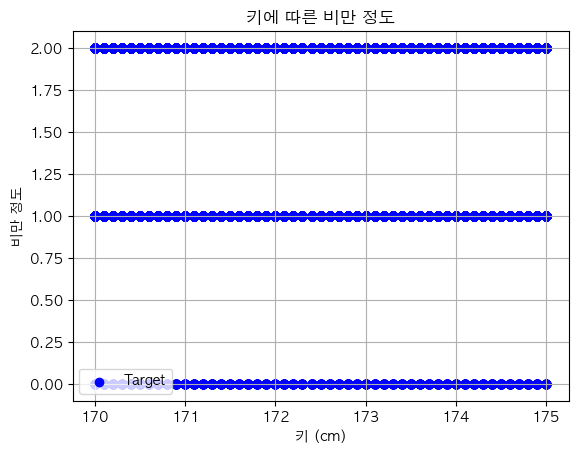

In [14]:
import matplotlib.pyplot as plt

# 산점도 그래프 그리기
plt.scatter(input_data[:, 0], target_data,marker='o', c='blue', label='Target') 
plt.xlabel('키 (cm)')
plt.ylabel('비만 정도')
plt.title('키에 따른 비만 정도')
plt.legend()
plt.grid(True)
plt.show()

### 훈련세트와 테스트세트 나누기

In [15]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(input_data, target_data, random_state=42)

### 표준화 전처리

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 로지스틱 회귀모델 생성

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000) #C=20, max_iter=1000  -> 이유
lr.fit(train_input, train_target)

LogisticRegression(C=20, max_iter=1000)

### 성능평가

In [18]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))


# print(lr.predict([[172, 50]]))
# print(lr.predict([[172, 66]]))
# print(lr.predict([[172, 78]]))

0.9996969908864182
0.9995804782547896
